In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR']= '/content'

In [7]:
!kaggle datasets download tongpython/cat-and-dog

cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!unzip /content/cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [9]:
!kaggle datasets lists competition

usage: kaggle datasets [-h]
                       {list,files,download,create,version,init,metadata,status}
                       ...
kaggle datasets: error: argument command: invalid choice: 'lists' (choose from 'list', 'files', 'download', 'create', 'version', 'init', 'metadata', 'status')


In [10]:
train_dir = '/content/training_set/training_set'
test_dir = '/content/test_set/test_set'

In [11]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
train_gen = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
test_gen = test_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_gen:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [15]:
from keras import layers, models

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [19]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['acc'])

In [20]:
history = model.fit_generator(
      train_gen,
      steps_per_epoch=100,
      epochs=30,
      validation_data=test_gen,
      validation_steps = 50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
100/100 [==============================] - 23s 116ms/step - loss: 0.7366 - acc: 0.4826 - val_loss: 0.6921 - val_acc: 0.5070
Epoch 2/30
100/100 [==============================] - 11s 110ms/step - loss: 0.6991 - acc: 0.5465 - val_loss: 0.6744 - val_acc: 0.6330
Epoch 3/30
100/100 [==============================] - 11s 111ms/step - loss: 0.6842 - acc: 0.6060 - val_loss: 0.6408 - val_acc: 0.6180
Epoch 4/30
100/100 [==============================] - 12s 115ms/step - loss: 0.6360 - acc: 0.6330 - val_loss: 0.5772 - val_acc: 0.7020
Epoch 5/30
100/100 [==============================] - 11s 113ms/step - loss: 0.6006 - acc: 0.6780 - val_loss: 0.5552 - val_acc: 0.7160
Epoch 6/30
100/100 [==============================] - 11s 115ms/step - loss: 0.5817 - acc: 0.7083 - val_loss: 0.5546 - val_acc: 0.7080
Epoch 7/30
100/100 [==============================] - 12s 118ms/step - loss: 0.5586 - acc: 0.7215 - val_loss: 0.5444 - val_acc: 0.7470
Epoch 8/30
100/100 [==============================] - 1

In [21]:
model.save('cats_dogs.h5')

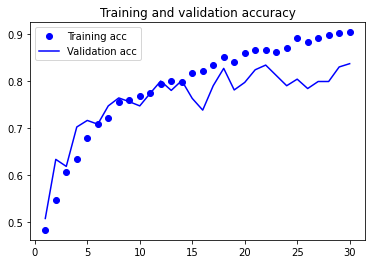

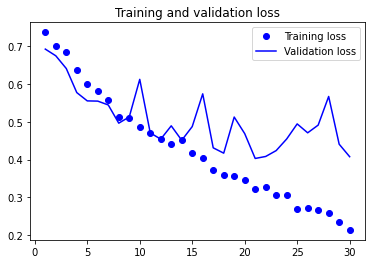

In [22]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()